Epoch 1/50
2612/2612 [==============================] - 2s 750us/step - loss: 1.4049 - accuracy: 0.6907 - val_loss: 0.8799 - val_accuracy: 0.6212
Epoch 2/50
2612/2612 [==============================] - 2s 678us/step - loss: 0.9751 - accuracy: 0.7327 - val_loss: 1.0297 - val_accuracy: 0.5954
Epoch 3/50
2612/2612 [==============================] - 2s 691us/step - loss: 0.9093 - accuracy: 0.7421 - val_loss: 0.6906 - val_accuracy: 0.8062
Epoch 4/50
2612/2612 [==============================] - 2s 680us/step - loss: 0.8601 - accuracy: 0.7494 - val_loss: 0.6165 - val_accuracy: 0.8191
Epoch 5/50
2612/2612 [==============================] - 2s 705us/step - loss: 0.8162 - accuracy: 0.7570 - val_loss: 0.8123 - val_accuracy: 0.7521
Epoch 6/50
2612/2612 [==============================] - 2s 717us/step - loss: 0.8160 - accuracy: 0.7558 - val_loss: 1.4411 - val_accuracy: 0.7882
Epoch 7/50
2612/2612 [==============================] - 2s 696us/step - loss: 0.7479 - accuracy: 0.7661 - val_loss: 0.7792 -

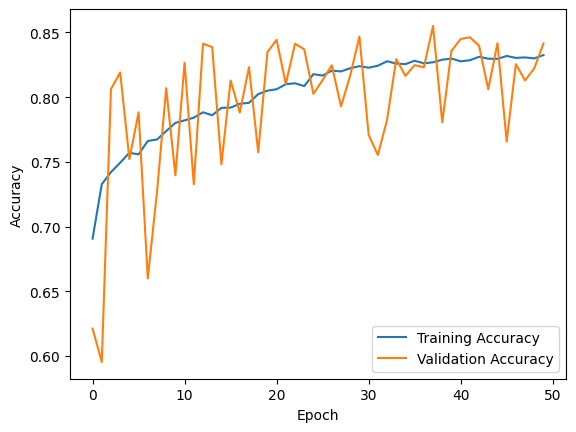

653/653 [==============================] - 0s 423us/step


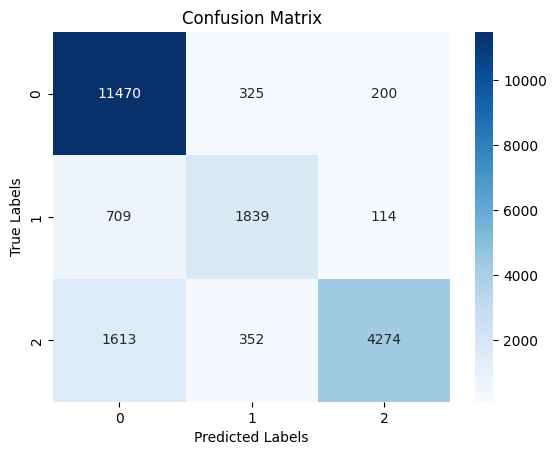

In [5]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to load data from multiple files
def load_activity_data(activity, file_prefix, num_files):
    data_list = []
    for i in range(1, num_files + 1):
        file_path = f"Data/{activity}/{file_prefix} {i}cleaned.csv"
        data = np.genfromtxt(file_path, delimiter=',')
        data_list.append(data)
    return np.concatenate(data_list, axis=0)

# Load data for each activity
reading_data = load_activity_data("Reading", "r", 6)
speaking_data = load_activity_data("Speaking", "s", 4)
watching_data = load_activity_data("Watching", "w", 6)

# Create labels for each activity
reading_labels = np.full((reading_data.shape[0],), fill_value=0)  # 0 represents reading
speaking_labels = np.full((speaking_data.shape[0],), fill_value=1)  # 1 represents speaking
watching_labels = np.full((watching_data.shape[0],), fill_value=2)  # 2 represents watching

# Concatenate data and labels
X = np.concatenate((reading_data, speaking_data, watching_data), axis=0)
y = np.concatenate((reading_labels, speaking_labels, watching_labels), axis=0)

# Encode labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Build a neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 output neurons for 3 classes (reading, speaking, watching)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Make predictions on the test set
predictions = model.predict(X_test)

# Decode labels if necessary
decoded_true_labels = label_encoder.inverse_transform(y_test)
decoded_predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

# Create a confusion matrix and plot it with custom labels
conf_matrix = confusion_matrix(decoded_true_labels, decoded_predicted_labels)
class_labels = label_encoder.classes_

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [8]:
import pandas as pd

# Create DataFrames for true labels and predicted labels
df_true = pd.DataFrame({'True_Labels': y_test})
df_pred = pd.DataFrame({'Predicted_Labels': decoded_predicted_labels})

# Concatenate both DataFrames along columns
result_df = pd.concat([df_true, df_pred], axis=1)

# Display the resulting DataFrame
print(result_df)


       True_Labels  Predicted_Labels
0                2                 0
1                2                 2
2                1                 1
3                0                 0
4                0                 0
...            ...               ...
20891            2                 2
20892            0                 0
20893            0                 0
20894            0                 0
20895            0                 0

[20896 rows x 2 columns]
